In [195]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [196]:
movies_df = pd.read_csv("movies.csv")
ratings_df= pd.read_csv("ratings.csv")

In [197]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [198]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [199]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [200]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [201]:
fianl_ratings_df = ratings_df.pivot(index ='movieId',columns = 'userId', values = 'rating')
fianl_ratings_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,4.0,5.0,3.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5


In [202]:
fianl_ratings_df.fillna(0,inplace=True)
fianl_ratings_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [203]:
no_user_voted = ratings_df.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings_df.groupby('userId')['rating'].agg('count')

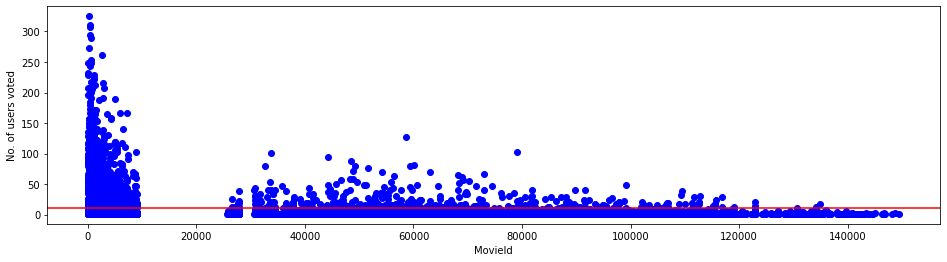

In [204]:
figure, ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10, color ='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [205]:
final_ratings_df = fianl_ratings_df.loc[no_user_voted[no_user_voted > 10].index,:]

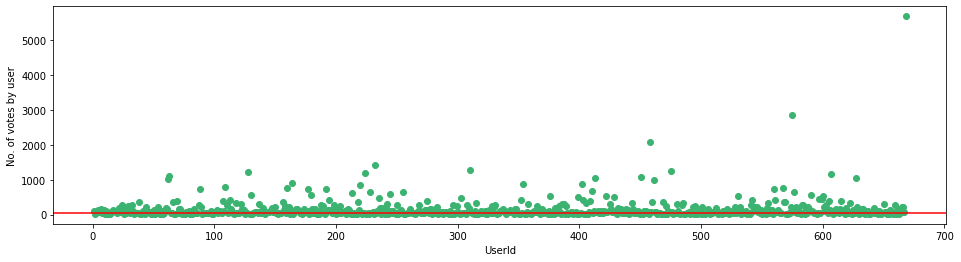

In [206]:
figure,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [207]:
final_ratings_df = fianl_ratings_df.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_ratings_df

userId,1,3,4,5,6,7,8,9,11,15,...,656,657,659,661,662,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
csr_data = csr_matrix(final_ratings_df.values)
final_ratings_df.reset_index(inplace=True)

In [209]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [210]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies_df[movies_df['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_ratings_df[final_ratings_df['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_ratings_df.iloc[val[0]]['movieId']
            idx = movies_df[movies_df['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies_df.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [213]:
get_movie_recommendation('Star Trek')

,Title,Distance
1,Outbreak (1995),0.449796
2,Cliffhanger (1993),0.449305
3,Jurassic Park (1993),0.449177
4,Batman (1989),0.437817
5,Star Trek: First Contact (1996),0.425922
6,Terminator 2: Judgment Day (1991),0.421729
7,Demolition Man (1993),0.419751
8,True Lies (1994),0.410589
9,Batman Forever (1995),0.380029
10,Stargate (1994),0.377072
